# Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

# Importing Data

In [2]:
# Creating a path to project folder.

path = r'C:\Users\TanaT\(CF) Achievement 4 - Instacart Basket Analysis'

In [4]:
# Importing exported data from part 1 of this exercise.

df_cust_merge =  pd.read_pickle(os.path.join(path, '02 Data','Prepared Data', 'customer_and_merged.pkl'))        

In [5]:
# Checking dataframe.

df_cust_merge.shape

(32404859, 34)

In [6]:
df_cust_merge.head()

,product_id,product_name,aisle_id,department_id,prices,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,...,first_name,last_name,gender,state,age,date_joined,n_dependants,fam_status,income,merge_status
0,1,Chocolate Sandwich Cookies,61,19,5.8,3139998,138,28,6,11,...,Charles,Cox,Male,Minnesota,81,8/1/2019,1,married,49620,both
1,1,Chocolate Sandwich Cookies,61,19,5.8,1977647,138,30,6,17,...,Charles,Cox,Male,Minnesota,81,8/1/2019,1,married,49620,both
2,1,Chocolate Sandwich Cookies,61,19,5.8,389851,709,2,0,21,...,Deborah,Glass,Female,Vermont,66,6/16/2018,2,married,158302,both
3,1,Chocolate Sandwich Cookies,61,19,5.8,652770,764,1,3,13,...,Heather,Myers,Female,Wisconsin,40,2/9/2020,3,married,31308,both
4,1,Chocolate Sandwich Cookies,61,19,5.8,1813452,764,3,4,17,...,Heather,Myers,Female,Wisconsin,40,2/9/2020,3,married,31308,both


# Part 2 - Exercise 4.9

## Step 2 - Completed in a separate notebook. 

## Step 3 - Create a histogram of the 'order_hour_of_day' column.

<Axes: ylabel='Frequency'>

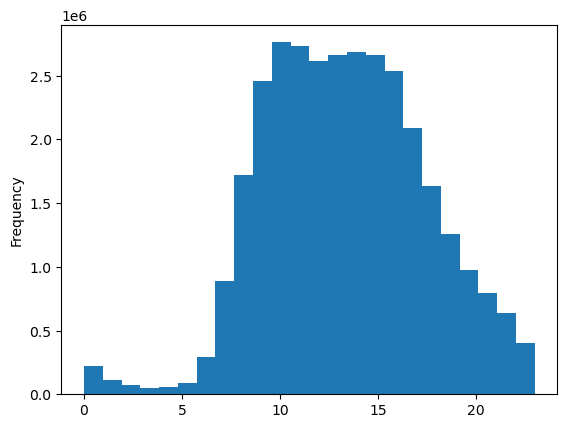

In [10]:
# You need to provide the Instacart senior stakeholders with descriptive findings about sales.
# Creating a histogram to show the distribution of orders during the day (24 hours). 

df_cust_merge['order_hour_of_day'].plot.hist(bins = 24)

- The histogram shows the number/count of orders throughout the day.
- There are 24 bins to represent the hours in a day to see how many orders are placed every hour. 

- Very few orders are placed during early morning hours (before 5am), but after 5am orders begin to rise and hit their peak.
- It seems like most orders are placed around 10/11am - 3pm.
- After around 3pm, orders begin to drop and continue to do so for the rest of the day.

### Saving histogram as an object to view and call later. 

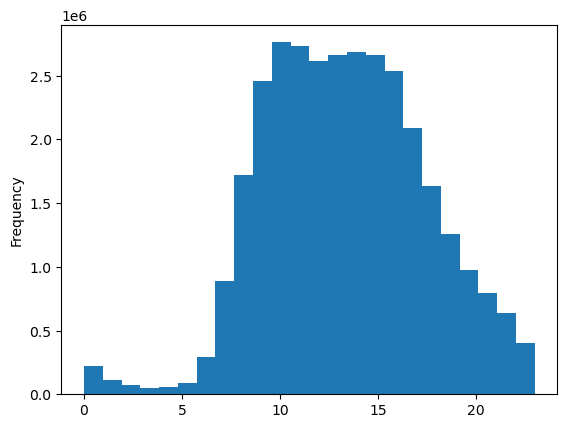

In [11]:
# Saving histogram.

hist = df_cust_merge['order_hour_of_day'].plot.hist(bins = 24)

## Step 4 - Create a bar chart from the 'loyalty_flag' column.

In [12]:
# Checking column names. 

df_cust_merge.columns

Index(['product_id', 'product_name', 'aisle_id', 'department_id', 'prices',
       'order_id', 'user_id', 'order_number', 'orders_day_of_week',
       'order_hour_of_day', 'days_since_prior_order', 'add_to_cart_order',
       'reordered', '_merge', 'price_range_loc', 'busiest_day', 'busiest_days',
       'busiest_period_of_day', 'max_order', 'loyalty_flag',
       'avg_product_price', 'spending_flag', 'median_days_between_orders',
       'ordering_behavior_flag', 'first_name', 'last_name', 'gender', 'state',
       'age', 'date_joined', 'n_dependants', 'fam_status', 'income',
       'merge_status'],
      dtype='object')

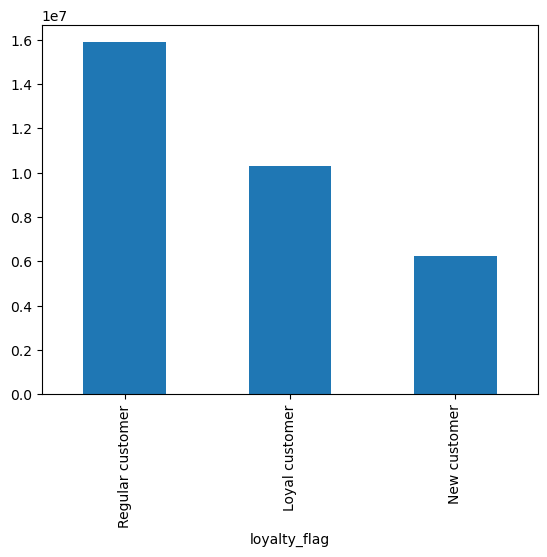

In [13]:
# The marketing team is curious about the distribution of orders among customers in terms of loyalty.
# Creating a bar chart to see if the number of orders differ among loyalty status of customers.
# Saving bar chart as an object. 

bar = df_cust_merge['loyalty_flag'].value_counts().plot.bar()

- Regular customers order the most (between 10 to 40 orders).
- Logically, new customers order the least (haven't been using the service as long as loyal and regular customers with <= 10 orders).
- Loyal customers have placed more orders (over 40), but they account for less of the customer base (there are more regular customers). 

#### Confused about what this is actually showing. Going to find the average number of orders placed among these groups.

In [14]:
df_cust_merge.groupby('loyalty_flag').agg({'order_number' : ['mean', 'min', 'max']})

order_number        
                         mean min max
loyalty_flag                         
Loyal customer      32.641196   1  99
New customer         3.807044   1  10
Regular customer    12.347452   1  40

- The bar chart doesn't actually show how orders are distributed among customers in terms of loyalty.
- The chart shows the count of the customers, where most customers are 'regular' and the least are 'new'.
- To actually know how orders are distributed among the loyalty status of customers, I would have to graph the stats above (mean) against loyalty status.
- This would then show that loyal customers place the most orders (~ 32), new customers the least (~ 3), and regular customers are in the middle (~ 12).

In [15]:
# Creating the mean as a variable.

mean_orders_loyalty_status = df_cust_merge.groupby('loyalty_flag')['order_number'].mean()

In [16]:
mean_orders_loyalty_status

loyalty_flag
Loyal customer      32.641196
New customer         3.807044
Regular customer    12.347452
Name: order_number, dtype: float64

<Axes: title={'center': 'Average Order Distribution Among Loyalty Status'}, xlabel='loyalty_flag'>

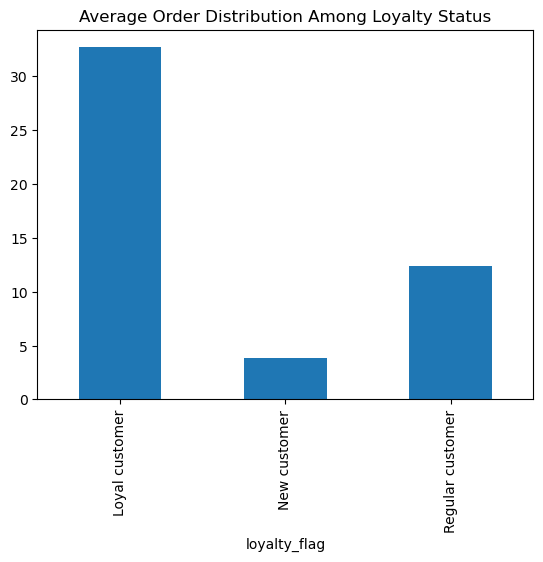

In [18]:
# Plotting this as a bar chart. 

mean_orders_loyalty_status.plot(kind='bar', title = 'Average Order Distribution Among Loyalty Status')

- This bar chart shows the average number of orders per loyalty status.
- Loyal customers place more orders than new and regular customers, which makes sense because of the conditions created when making the flags.
- Loyal customers place over 40 orders (more than the other loyalty statuses).

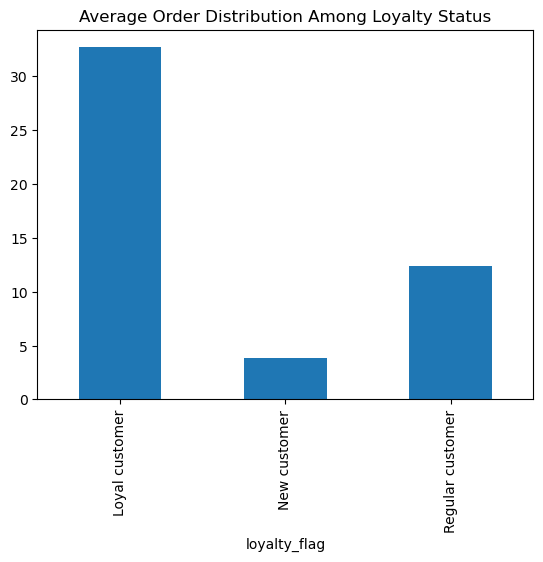

In [34]:
# Saving this bar chart as an object. 

bar2 = mean_orders_loyalty_status.plot(kind='bar', title = 'Average Order Distribution Among Loyalty Status')

## Step 5- Check whether there's a difference in expenditure ('prices' column') depending on the hour of day. 

### Making a sample to use for creating a line chart.

In [19]:
# Setting the seed and using a 70/30 split for dividing the dataframe.

np.random.seed(4)
dev = np.random.rand(len(df_cust_merge)) <= 0.7

In [20]:
# Store 70% of the sample in the dataframe 'big'.

big = df_cust_merge[dev]

In [21]:
# Store 30% of the sample in the dataframe 'small'.

small = df_cust_merge[~dev]

In [23]:
# Now checking the length of the entire dataframe. 

len(df_cust_merge)

32404859

In [24]:
# Checking/comparing the length of the two samples, making sure it matches the length of the entire dataframe.

len(big) + len(small)

32404859

In [25]:
# Speeding up process by reducing the samples to only contain the columns needed. 
# Making a new dataframe that only contains the 'prices' and 'order_hour_of_day' columns (to chart from the small SAMPLING DATA).

df_2 =  small[['order_hour_of_day', 'prices']]
df_2

,order_hour_of_day,prices
0,11,5.8
2,21,5.8
3,13,5.8
6,14,5.8
10,11,5.8
...,...,...
32404841,11,13.5
32404842,20,13.5
32404843,10,13.5
32404849,9,13.5


### Creating the line chart based on the small sampling data and specific columns. 

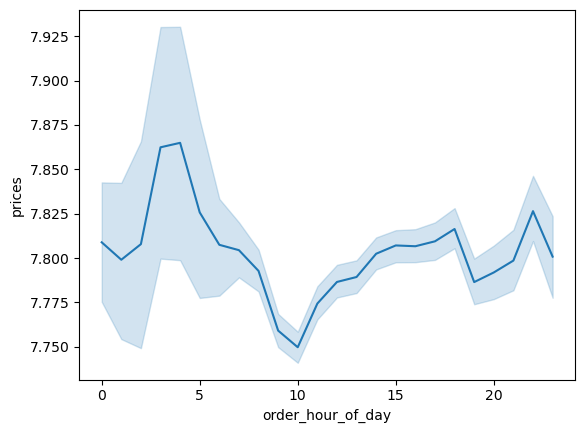

In [26]:
# Creating the line chart based on the small sampling data and specific columns.
# Charting prices throughout the hours of the day.
# Saving the line chart as an object called 'line'.

line = sns.lineplot(data = df_2, x = 'order_hour_of_day', y = 'prices')

- Based on the histogram, we know that most orders are placed between around 10/11am - 3pm, yet prices are the lowest at 10am.
- This could be why most orders are placed during this time (due to low prices). 
- Prices seem to be the highest when orders are placed the least (before 5am).
- I previously thought orders are not placed during early morning due to people probably being alseep, but maybe high prices are a factor to low orders during this time. 

## Step 6 - Determine whether there is a connection between age and family situation by creating a line chart exploring age and number of dependents. 

In [27]:
# Making a new dataframe that only contains the 'age' and 'n_dependants' columns (to chart from the small SAMPLING DATA).

df_3 =  small[['n_dependants', 'age']]
df_3

,n_dependants,age
0,1,81
2,2,66
3,3,40
6,3,20
10,1,61
...,...,...
32404841,1,59
32404842,0,39
32404843,2,53
32404849,0,66


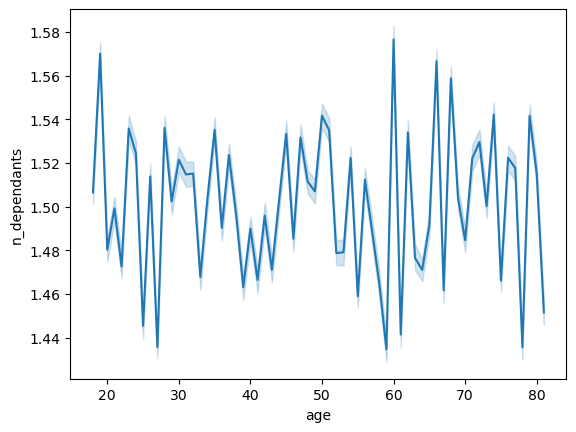

In [29]:
# Creating new line chart. 
# Note - 'dependants' is British English (could change to fit American English)

line_age_dep = sns.lineplot(data = df_3, x = 'age', y = 'n_dependants')

- There does not seem to be a connection between age and number of dependents, the data varies greatly, with no clear pattern.
- However, it does show that older individuals have dependents, which I found to be unexpected.
- This also means that age is not a strong predictor of number of dependents and other variables should be explored like marital status and/or gender.

Text(0, 0.5, 'n_dependents')

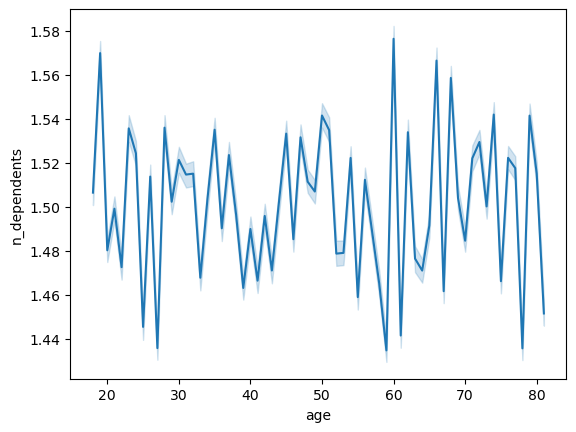

In [31]:
# Changing the y-axis label. 

line_age_dep2 = sns.lineplot(data = df_3, x = 'age', y = 'n_dependants')

plt.ylabel('n_dependents')

## Step 7 - Explore whether there's a connection between age and spending power (income). Create a scatterplot to visualize this relationship. 

<Axes: xlabel='age', ylabel='income'>

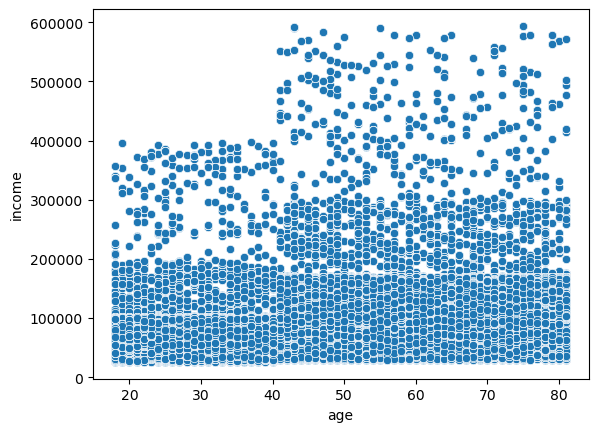

In [30]:
# Plotting age and income, to see if they are related.
# Using the entire dataframe, not sampling data.

sns.scatterplot(x = 'age', y = 'income', data = df_cust_merge)

- The scatterplot shows that age and income are not related.
- It seems like most customers make under 200,000 dollars across all ages (more concentrated dots) and that age 40 is a point of change.
- Customers under 40 earn a max of around 400,000 dollars.
- After 40, older individuals seem to mostly earn around 200,000 - 300,000 dollars, with fewer individuals having a higher income of over 400,000 dollars.

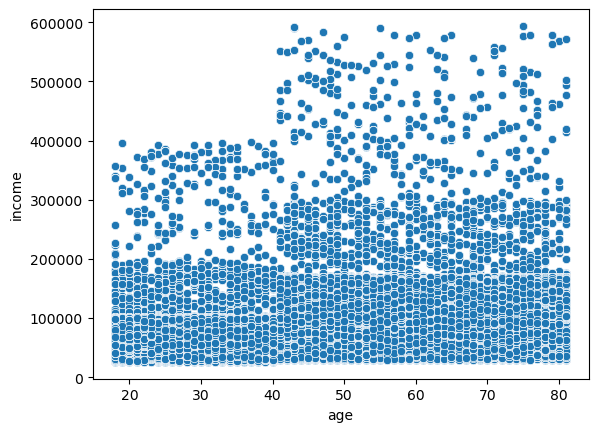

In [38]:
# Saving the scatterplot as an object to export. 

scatterplot = sns.scatterplot(x = 'age', y = 'income', data = df_cust_merge)

# Step 8 - Exporting Visualizations

### Exporting Histogram

In [32]:
hist.figure.savefig(os.path.join(path, '04 Analysis and Results','Visualizations', 'hist_order_distribution_hours.png'))

### Exporting Bar Charts

In [33]:
bar.figure.savefig(os.path.join(path, '04 Analysis and Results','Visualizations', 'bar_count_loyalty_flags.png'))

In [35]:
bar2.figure.savefig(os.path.join(path, '04 Analysis and Results','Visualizations', 'bar_avg_order_dist_loyalty_status.png'))

### Exporting Line Charts

In [36]:
line.figure.savefig(os.path.join(path, '04 Analysis and Results','Visualizations', 'line_prices_hours_of_day.png'))

In [37]:
line_age_dep2.figure.savefig(os.path.join(path, '04 Analysis and Results','Visualizations', 'line_age_dependents.png'))

### Exporting Scatterplot

In [39]:
scatterplot.figure.savefig(os.path.join(path, '04 Analysis and Results','Visualizations', 'scatterplot_age_income.png'))